
**<br>Understanding Benfords law on a COVID dataset**
**<br>Author: Jatan Pandya**


In [54]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chisquare


**Read the CSV file**

In [55]:
covid19_df = pd.read_csv('us_states_covid19_daily.csv')
covid19_df
df = covid19_df.copy()
df


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200810,AK,4539.0,275804.0,NaN,37.0,NaN,NaN,NaN,3.0,...,280343,0,0,b509299c436632a9bb6c07a37fe0a942ba42d736,0,0,0,0,0,NaN
1,20200810,AL,103020.0,677547.0,NaN,1528.0,12070.0,NaN,1249.0,NaN,...,780567,29,533,bc7c88c5e4e61a5aacd73bceef95889e5b77bbd3,0,0,0,0,0,NaN
2,20200810,AR,50028.0,519292.0,NaN,508.0,3336.0,NaN,NaN,117.0,...,569320,11,52,3003372b79996f2d842ac417e2dceaab2971a7b3,0,0,0,0,0,NaN
3,20200810,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1396,0,0,ccffb3614fb87b4cafee3b19c44d3eb7d10d5913,0,0,0,0,0,NaN
4,20200810,AZ,187523.0,840708.0,NaN,1575.0,19277.0,506.0,NaN,366.0,...,1028231,4,9,56226bd3514052487433ab4eeb94e8ef3f6e058f,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN
8861,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN
8862,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN
8863,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,NaN


**Ignore NaN values by replacing them with zero. Zero is ignored while calculating the observed frequencies. Only 1-9 are considered**

In [ ]:

df['positive'] = df['positive'].fillna(0)

##Check if there are any positive values less than 1 and greater than 0
if ((df["positive"] > 0) & (df["positive"] < 1)).any():
    raise ValueError("Column 'positive' contains values between 0 and 1")


ValueError: Column 'positive' contains values between 0 and 1

In [ ]:
##Vectorized approach to get leading digit
s = df["positive"]
df["positive"] = (
    s.astype(str)
     .str.lstrip('-')        # optional: handle negatives
     .str.replace('.', '', regex=False)
     .str.lstrip('0')
     .str[0]
     .fillna('0')            # handles 0 or all-zero strings
     .astype(int)
)


**frequency distribution - hist**

In [ ]:
#hist(series) - frequency distribution
hist = df.groupby('positive').size()
##convert hist from series to dataframe
hist = hist.reset_index(name='Count')
hist
isinstance(hist, pd.DataFrame)

True

**Drop the zero**

In [ ]:

## Remove count of digit 0, if present
if(hist.index[0] == 0.0):
    hist = hist.drop(hist.index[0])



**Count in percentages**

In [ ]:
total_count = hist.sum()
normalized_final_hist = (hist['Count']/total_count['Count'])*100
print(type(normalized_final_hist))
normalized_final_hist

<class 'pandas.core.series.Series'>


1    29.686047
2    15.662791
3    13.767442
4    10.569767
5     7.860465
6     7.651163
7     5.337209
8     4.674419
9     4.790698
Name: Count, dtype: float64

**New dataframe with both actual and expected frequency distributions**

In [ ]:
d = {'actual' : normalized_final_hist,
    'expected' : pd.Series([30.1, 17.6, 12.5,9.7,7.9,6.7,5.8,5.1,4.6], index=[1.0, 2.0, 3.0,4.0,5.0,6.0,7.0,8.0,9.0])}
df = pd.DataFrame(d)
df


,actual,expected
1.0,29.686047,30.1
2.0,15.662791,17.6
3.0,13.767442,12.5
4.0,10.569767,9.7
5.0,7.860465,7.9
6.0,7.651163,6.7
7.0,5.337209,5.8
8.0,4.674419,5.1
9.0,4.790698,4.6


<Axes: xlabel='First Digit', ylabel='Count'>

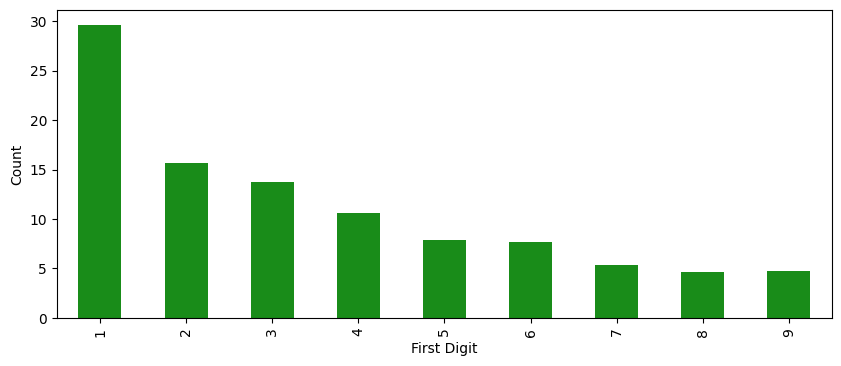

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
plt.xlabel('First Digit')
plt.ylabel('Count')
normalized_final_hist.plot(kind = 'bar', ax=ax, alpha = 0.9,color='g' )

<Axes: >

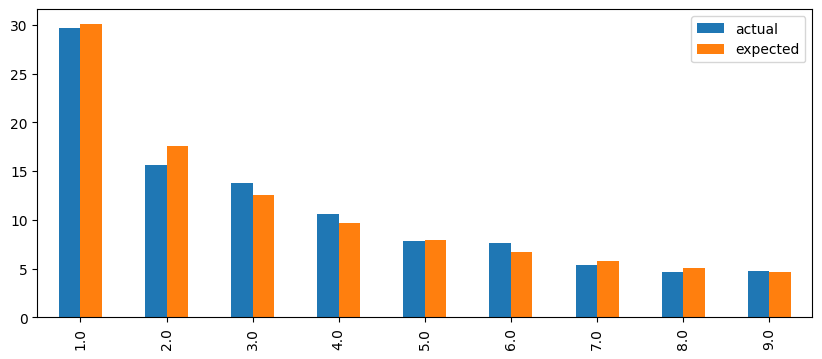

In [ ]:
df.plot(kind = 'bar',figsize=(10,4))

**Chi-Square hypothesis testing**
**A goodness-of-fit test checks if your data matches an expected distribution; the null hypothesis (\(H_{0}\)) is that the data does follow that specified pattern (e.g., equal proportions or a specific distribution like Poisson/Normal). You interpret it by comparing observed data to expected data: a small test statistic (high p-value) means the data fits well (fail to reject \(H_{0}\)), while a large statistic (low p-value) suggests a poor fit (reject \(H_{0}\)). **

In [ ]:
chi_square_statistic, p_value = chisquare(df['actual'], df['expected'])

print(f"Chi-square statistic: {chi_square_statistic}")
print(f"P-value: {p_value}")

# Interpret the results (commonly using a significance level of 0.05)
alpha = 0.10
if p_value < alpha:
    print("Result: Reject the null hypothesis (the observed distribution is significantly different from the expected distribution)")
else:
    print("Result: Fail to reject the null hypothesis (the observed distribution fits the expected distribution)")


Chi-square statistic: 0.6409962476181587
P-value: 0.9996593220222274
Result: Fail to reject the null hypothesis (the observed distribution fits the expected distribution)
